In [1]:
%matplotlib inline

import h5py
import matplotlib.pyplot as plt
import numpy as np

from sklearn import mixture
from mvn import MVN

In [28]:
# constants
RESAMPLE = 6
GMM_DYN_COMPONENTS = 10

In [3]:
# load data
f = h5py.File( 'data.h5', 'r' )
x = f[ 'x' ]
x = x[ ::RESAMPLE ]

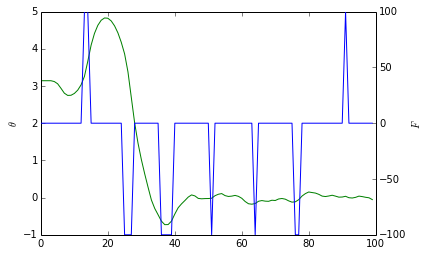

In [4]:
# plot data
fig, ax1 = plt.subplots()
ax1.plot( x[ :,1 ], 'g-' )
ax1.set_ylabel( r'$\theta$' )

ax2 = ax1.twinx()
ax2.plot( x[ :, 5 ], 'b' )
ax2.set_ylabel( '$F$' )

In [5]:
g1 = MVN( x[ 10, 1:], np.array( [ 0.5, 0.5, 0.5, 0.5, 0.5  ] ) )

In [29]:
x_dyn = np.column_stack( ( x[ 1:, 1:5 ], x[ :-1, 1:6 ] ) )

In [30]:
gmm = mixture.GMM( n_components=GMM_DYN_COMPONENTS, covariance_type='full' )
gmm.fit( x_dyn )

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=10, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)

In [33]:
gmm.covars_.shape

(10, 9, 9)